In [1]:
import numpy as np 
import pandas as pd 
import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

['Advertising.csv']


In [2]:
file = '../input/Advertising.csv'
data = pd.read_csv(file)

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [6]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


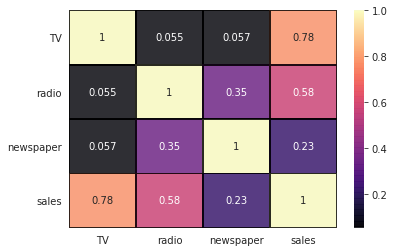

In [7]:
sns.heatmap(data.corr(),cmap = 'magma',lw = .7,linecolor = 'black',alpha = 0.8,annot = True)

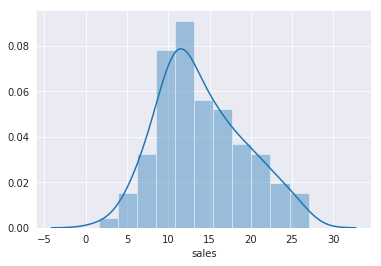

In [8]:
sns.distplot(data['sales'],hist = True)

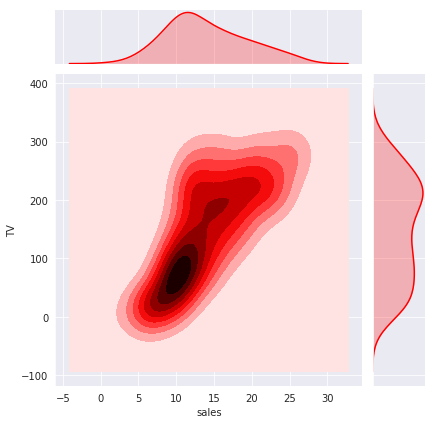

In [9]:
sns.jointplot(x = 'sales',y = 'TV',data = data,kind = 'kde',color = 'red')

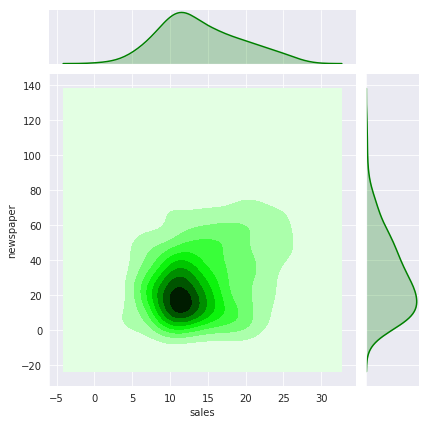

In [10]:
sns.jointplot(x = 'sales',y = 'newspaper',data = data,kind = 'kde',color = 'green',hist = True)

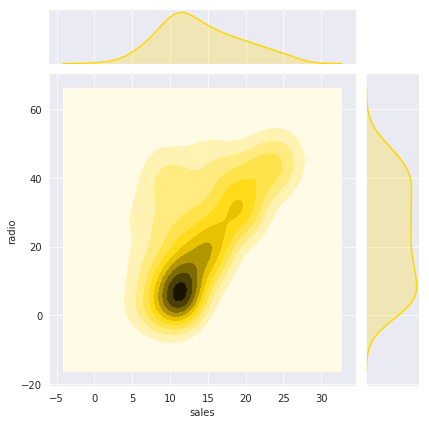

In [11]:
sns.jointplot(x = 'sales',y = 'radio',data = data,kind = 'kde',color = 'gold',hist = True)

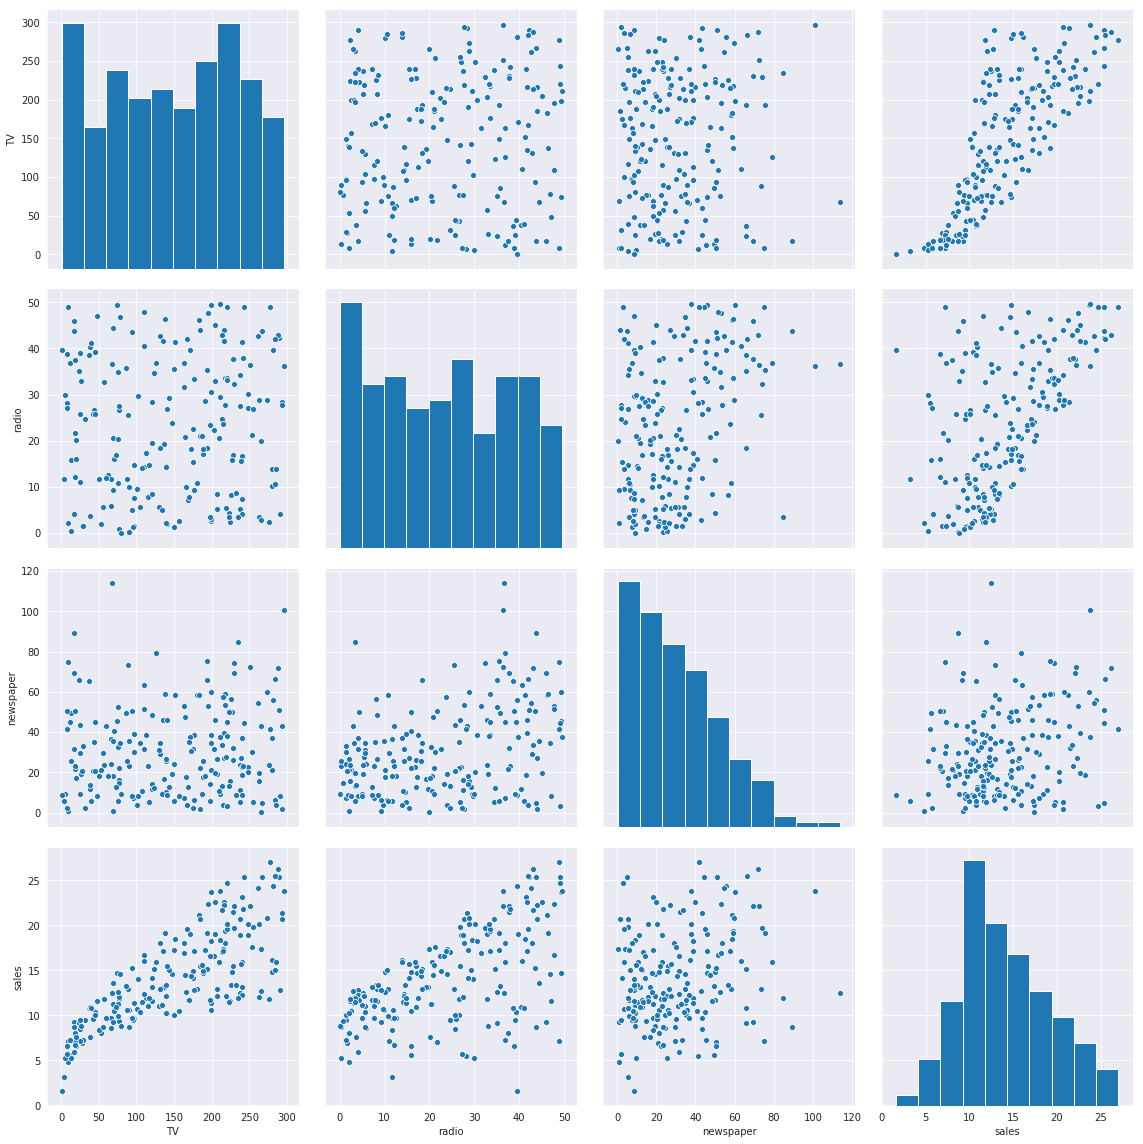

In [12]:
sns.pairplot(data,height = 4)

In [13]:
X = data.drop(['sales'],axis = 1)
y = data['sales']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
logmodel =  LogisticRegression()

In [17]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train)

In [18]:
lab_enc = preprocessing.LabelEncoder()
encoded2 = lab_enc.fit_transform(y_test)

In [19]:
logmodel.fit(X_train,encoded)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
predictions = logmodel.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(encoded2,predictions))
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.50      0.50      0.50         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00    